#**Import necessary libraries such as pandas, numpy, and matplotlib for data manipulation and visualization**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

#**Load the Titanic dataset from a remote URL using pandas**

In [2]:
url_train = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url_train)


data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#**Check for missing values in the dataset and drop unnecessary columns**

In [3]:
print(data.isnull().sum())
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)


data.head()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-2986489170.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-2986489170.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
1,2,1,1,1,38.0,1,0,71.2833,0.0
2,3,1,3,1,26.0,0,0,7.9250,2.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
4,5,0,3,0,35.0,0,0,8.0500,2.0


#**Fill missing values in the 'Embarked' column using the mode of the column**

In [4]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

print("Missing values after preprocessing:\n", data.isnull().sum())

X = data.drop(columns=['Survived'])
y = data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

print("Min and Max of X_train before scaling:", np.min(X_train), np.max(X_train))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Min and Max of X_train after scaling:", np.min(X_train), np.max(X_train))

Missing values after preprocessing:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
Min and Max of X_train before scaling: 0.0 891.0
Min and Max of X_train after scaling: -2.2143625673279588 9.2377241678583


/tmp/ipython-input-188903358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


#**Build and compile a neural network model with dense layers and ReLU/Sigmoid activations**

In [5]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#**Display the summary of the model architecture and train the model with the training data**

In [6]:
model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.7076 - loss: 0.6184 - val_accuracy: 0.7374 - val_loss: 0.5505
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8017 - loss: 0.5121 - val_accuracy: 0.7821 - val_loss: 0.4875
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8197 - loss: 0.4653 - val_accuracy: 0.8045 - val_loss: 0.4548
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8152 - loss: 0.4460 - val_accuracy: 0.7989 - val_loss: 0.4368
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8089 - loss: 0.4461 - val_accuracy: 0.7933 - val_loss: 0.4209
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8152 - loss: 0.4154 - val_accuracy: 0.7989 - val_loss: 0.4140
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8327 - loss: 0.4111 - val_accuracy: 0.8045 - val_loss: 0.4116
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8383 - loss: 0.3922 - val_accuracy: 0.8101 - val_l

#**Evaluate the model on the test set and print the test loss and accuracy**

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8324 - loss: 0.4017 
Test accuracy: 0.826815664768219


#**Make predictions on the test set and compute the predicted probabilities**

In [8]:
predictions = model.predict(X_test)
predictions_prob = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

print(predictions[:10])
print("Confusion Matrix:")
cm = confusion_matrix(y_test, predictions)
print(cm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]
Confusion Matrix:
[[94 11]
 [20 54]]


#**Evaluate model performance using precision, recall, and F1 score.**

In [9]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.8307692307692308
Recall: 0.7297297297297297
F1-Score: 0.7769784172661871


#**Predict the test set labels and convert probabilities to binary predictions**

In [10]:
predictions = model.predict(X_test)

predictions = (predictions > 0.5).astype(int)

for i in range(10):
    print(f"Passenger {i+1}:")
    actual = "Survived" if y_test.iloc[i] == 1 else "Died"
    prediction = "Survived" if predictions[i] == 1 else "Died"
    correct = "Correct" if actual == prediction else "Incorrect"
    print(f"  Actual: {actual}")
    print(f"  Predicted: {prediction}")
    print(f"  Prediction was: {correct}")
    print('-' * 30)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Passenger 1:
  Actual: Survived
  Predicted: Died
  Prediction was: Incorrect
------------------------------
Passenger 2:
  Actual: Died
  Predicted: Died
  Prediction was: Correct
------------------------------
Passenger 3:
  Actual: Died
  Predicted: Died
  Prediction was: Correct
------------------------------
Passenger 4:
  Actual: Survived
  Predicted: Survived
  Prediction was: Correct
------------------------------
Passenger 5:
  Actual: Survived
  Predicted: Survived
  Prediction was: Correct
------------------------------
Passenger 6:
  Actual: Survived
  Predicted: Survived
  Prediction was: Correct
------------------------------
Passenger 7:
  Actual: Survived
  Predicted: Survived
  Prediction was: Correct
------------------------------
Passenger 8:
  Actual: Died
  Predicted: Died
  Prediction was: Correct
------------------------------
Passenger 9:
  Actual: Survived
  Predicted: Survived
  Prediction was: Correct
--------------------

#**Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve.**

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


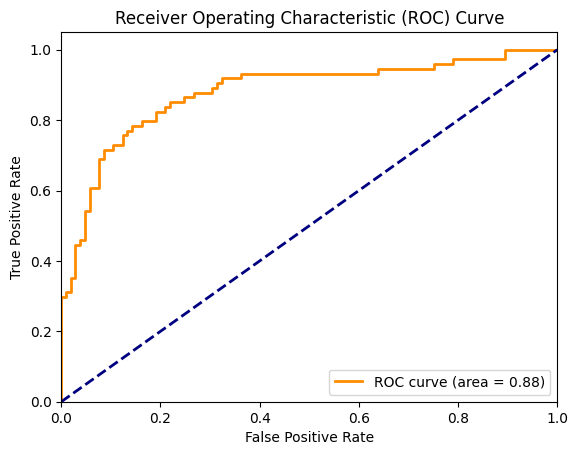

In [11]:
%matplotlib inline

predictions_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#**Plot the ROC curve with the calculated FPR and TPR, and display the AUC (Area Under Curve) score.**

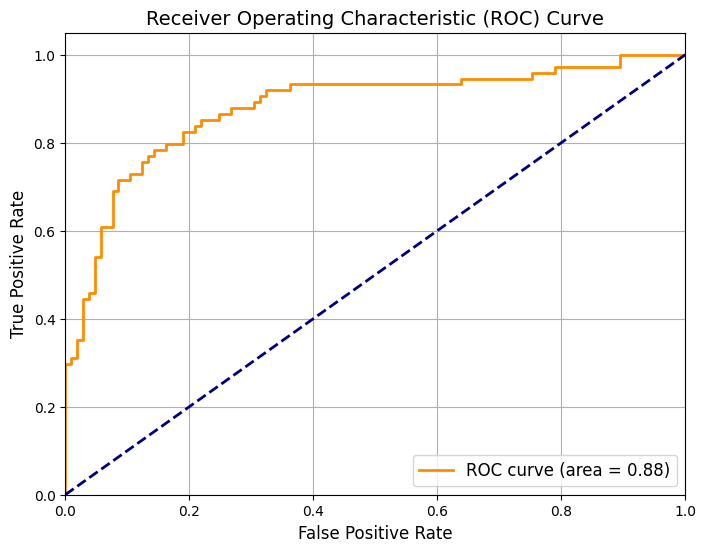

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.grid(True)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)

plt.legend(loc="lower right", fontsize=12)

plt.show()


***Powerd By Miracle⚡***